
## MountainCar-v0 implementation with QLearning

### Load the required python packages and intialize the environment, 

 -  To preparae the nevirnment run this Jupyter notebook    

 **Run env - Run on Local Jupyter Notebook**

In [ ]:
pip install gym


import numpy as np
import gym
import matplotlib.pyplot as plt

### Build the Q-Table
The Q-Table contains all of our possible discrete states. 
Next update the Q-Values (value per possible action per unique state), which brought us to:

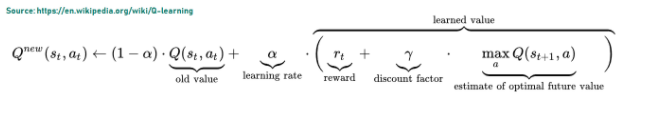

new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

### Steps

The policy is to get the best benefit over the time rather than immediate reward. The DISCOUNT is a measure of how much we want to care about FUTURE reward.
This value will be fairly high, and is between 0 and 1. We want it keep it high because the purpose of Q Learning is to learn from a chain of events that ends with a positive outcome, and the best reward .So long term gain is of greater importance than short terms gains.

The max_future_q is grabbed after we've performed our action already, and then update our previous values based partially on the next-step's best Q value. 
Over time, we reach the objective once, this "reward" value gets slowly back-propagated, one step at a time, per episode. 




In [3]:
# Import and initialize Mountain Car Environment
env = gym.make('MountainCar-v0')
env.reset()

# Define Q-learning function
def QLearning(env, learning, discount, epsilon, min_eps, episodes):
    # Determine size of discretized state space
    num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1
    
    # Initialize Q table
    Q = np.random.uniform(low = -1, high = 1, 
                          size = (num_states[0], num_states[1], 
                                  env.action_space.n))
    
    # Initialize variables to track rewards
    reward_list = []
    ave_reward_list = []
    
    # Calculate episodic reduction in epsilon
    reduction = (epsilon - min_eps)/episodes
    
    # Run Q learning algorithm
    for i in range(episodes):
        # Initialize parameters
        done = False
        tot_reward, reward = 0,0
        state = env.reset()
        
        # Discretize state
        state_adj = (state - env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
    
        while done != True:   
            # Render environment for last five episodes
            if i >= (episodes - 20):
                env.render()
                
            # Determine next action - epsilon greedy strategy
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]]) 
            else:
                action = np.random.randint(0, env.action_space.n)
                
            # Get next state and reward
            state2, reward, done, info = env.step(action) 
            
            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)
            
            #Allow for terminal states
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward
                
            # Adjust Q value for current state
            else:
                delta = learning*(reward + 
                                 discount*np.max(Q[state2_adj[0], 
                                                   state2_adj[1]]) - 
                                 Q[state_adj[0], state_adj[1],action])
                Q[state_adj[0], state_adj[1],action] += delta
                                     
            # Update variables
            tot_reward += reward
            state_adj = state2_adj
        
        # Decay epsilon
        if epsilon > min_eps:
            epsilon -= reduction
        
        # Track rewards
        reward_list.append(tot_reward)
        
        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []
            
        if (i+1) % 100 == 0:    
            print('Episode {} Average Reward: {}'.format(i+1, ave_reward))
            

    env.close()
    
    return ave_reward_list

# Run Q-learning algorithm
rewards = QLearning(env, 0.2, 0.9, 0.8, 0, 5000)

# Plot Rewards
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.savefig('rewards.jpg')     
plt.close() 
  

Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -200.0
Episode 400 Average Reward: -200.0
Episode 500 Average Reward: -200.0
Episode 600 Average Reward: -200.0
Episode 700 Average Reward: -200.0
Episode 800 Average Reward: -200.0
Episode 900 Average Reward: -200.0
Episode 1000 Average Reward: -200.0
Episode 1100 Average Reward: -200.0
Episode 1200 Average Reward: -200.0
Episode 1300 Average Reward: -200.0
Episode 1400 Average Reward: -200.0
Episode 1500 Average Reward: -200.0
Episode 1600 Average Reward: -200.0
Episode 1700 Average Reward: -200.0
Episode 1800 Average Reward: -200.0
Episode 1900 Average Reward: -200.0
Episode 2000 Average Reward: -200.0
Episode 2100 Average Reward: -200.0
Episode 2200 Average Reward: -200.0
Episode 2300 Average Reward: -200.0
Episode 2400 Average Reward: -200.0
Episode 2500 Average Reward: -200.0
Episode 2600 Average Reward: -199.95
Episode 2700 Average Reward: -200.0
Episode 2800 Average Reward: -199.54

## Program -2 

Reference :
https://pythonprogramming.net/q-learning-analysis-reinforcement-learning-python-tutorial/

### Random Search Policy

The LEARNING_RATE is between 0 and 1, same for discount. The EPISODES is how many iterations of the game we'd like to run.

Next, we need a quick helper-function that will convert our environment "state," which currently contains continuous values that would wind up making our Q-Table absolutely gigantic and take forever to learn.... to a "discrete" state instead.

In [8]:
# objective is to get the cart to the flag.
# for now, let's just move randomly:

import gym
import numpy as np

env = gym.make("MountainCar-v0")

LEARNING_RATE = 0.1

DISCOUNT = 0.95
EPISODES = 4000
SHOW_EVERY = 1000
STATS_EVERY = 100
# For stats
ep_rewards = []
aggr_ep_rewards = {'ep': [], 'avg': [], 'max': [], 'min': []}

DISCRETE_OS_SIZE = [20] * len(env.observation_space.high)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low)/DISCRETE_OS_SIZE

# Exploration settings
epsilon = 1  # not a constant, qoing to be decayed
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = EPISODES//2
epsilon_decay_value = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)


q_table = np.random.uniform(low=-2, high=0, size=(DISCRETE_OS_SIZE + [env.action_space.n]))


def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low)/discrete_os_win_size
    return tuple(discrete_state.astype(np.int))  # we use this tuple to look up the 3 Q values for the available actions in the q-table


for episode in range(EPISODES):
    # Task3 - For stat plot
    episode_reward = 0
    discrete_state = get_discrete_state(env.reset())
    done = False

    if episode % SHOW_EVERY == 0:
        render = True
        print(episode)
    else:
        render = False

    while not done:

        if np.random.random() > epsilon:
            # Get action from Q table
            action = np.argmax(q_table[discrete_state])
        else:
            # Get random action
            action = np.random.randint(0, env.action_space.n)


        new_state, reward, done, _ = env.step(action)
        #Task3 store the reward
        episode_reward += reward

        new_discrete_state = get_discrete_state(new_state)

        if episode % SHOW_EVERY == 0:
            env.render()
        #new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

        # If simulation did not end yet after last step - update Q table
        if not done:

            # Maximum possible Q value in next step (for new state)
            max_future_q = np.max(q_table[new_discrete_state])

            # Current Q value (for current state and performed action)
            current_q = q_table[discrete_state + (action,)]

            # And here's our equation for a new Q value for current state and action
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

            # Update Q table with new Q value
            q_table[discrete_state + (action,)] = new_q


        # Simulation ended (for any reson) - if goal position is achived - update Q value with reward directly
        elif new_state[0] >= env.goal_position:
            #q_table[discrete_state + (action,)] = reward
            q_table[discrete_state + (action,)] = 0

        discrete_state = new_discrete_state

    # Decaying is being done every episode if episode number is within decaying range
    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value

    ep_rewards.append(episode_reward)
    if not episode % STATS_EVERY:
        average_reward = sum(ep_rewards[-STATS_EVERY:])/STATS_EVERY
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(average_reward)
        aggr_ep_rewards['max'].append(max(ep_rewards[-STATS_EVERY:]))
        aggr_ep_rewards['min'].append(min(ep_rewards[-STATS_EVERY:]))
        print(f'Episode: {episode:>5d}, average reward: {average_reward:>4.1f}, current epsilon: {epsilon:>1.2f}')

END_EPSILON_DECAYING = EPISODES


#env.close()

0
Episode:     0, average reward: -2.0, current epsilon: 1.00
Episode:   100, average reward: -200.0, current epsilon: 0.95
Episode:   200, average reward: -200.0, current epsilon: 0.90
Episode:   300, average reward: -200.0, current epsilon: 0.85
Episode:   400, average reward: -200.0, current epsilon: 0.80
Episode:   500, average reward: -200.0, current epsilon: 0.75
Episode:   600, average reward: -200.0, current epsilon: 0.70
Episode:   700, average reward: -200.0, current epsilon: 0.65
Episode:   800, average reward: -200.0, current epsilon: 0.60
Episode:   900, average reward: -200.0, current epsilon: 0.55
1000
Episode:  1000, average reward: -200.0, current epsilon: 0.50
Episode:  1100, average reward: -200.0, current epsilon: 0.45
Episode:  1200, average reward: -200.0, current epsilon: 0.40
Episode:  1300, average reward: -200.0, current epsilon: 0.35
Episode:  1400, average reward: -199.8, current epsilon: 0.30
Episode:  1500, average reward: -199.8, current epsilon: 0.25
Epi

In [5]:
env.close()

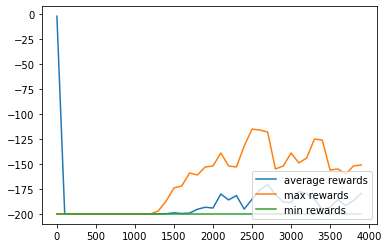

In [6]:
#Comparing Average, Max & Min Reward values 
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label="average rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label="max rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], label="min rewards")
plt.legend(loc=4)
plt.show()

In [7]:
END_EPSILON_DECAYING = EPISODES

